In [2]:
!pip install dgl

     |████████████████████████████████| 3.0MB 9.4MB/s 


In [3]:
import networkx as nx
import dgl

g_nx = nx.petersen_graph()
g_dgl = dgl.DGLGraph(g_nx)

DGL backend not selected or invalid.  Assuming PyTorch for now.
Using backend: pytorch


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


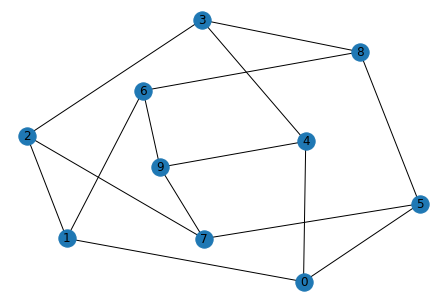

In [4]:
import matplotlib.pyplot as plt
nx.draw(g_nx, with_labels=True)
plt.show()

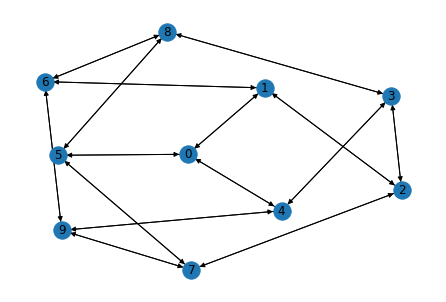

In [5]:
nx.draw(g_dgl.to_networkx(), with_labels=True)
plt.show()

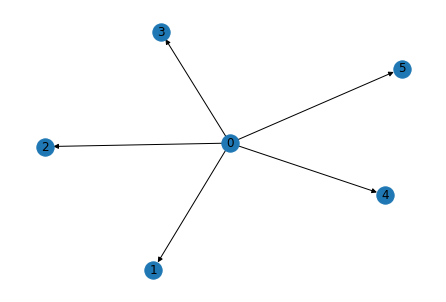

In [6]:
import torch as th
import numpy as np
import scipy.sparse as spp

# Create a star graph from a pair of arrays
u = th.tensor([0, 0, 0, 0, 0])
v = th.tensor([1, 2, 3, 4, 5])
star1 = dgl.DGLGraph((u, v))
nx.draw(star1.to_networkx(), with_labels=True)
plt.show()

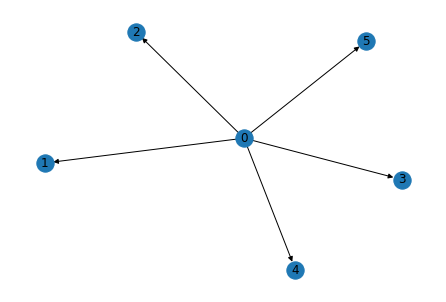

In [8]:
# Create the same graph in one go, if one of the arrays is a scalar,
# Edge broadcasting
star2 = dgl.DGLGraph((0, v))
nx.draw(star2.to_networkx(), with_labels=True)
plt.show()

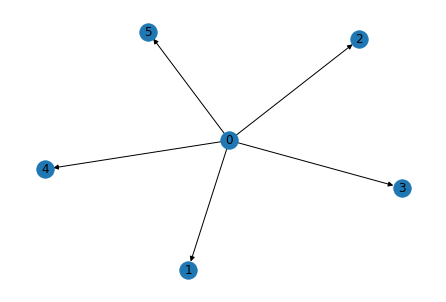

In [10]:
#Graph from scipy sparse matrix
adj = spp.coo_matrix((np.ones(len(u)), (u.numpy(), v.numpy())))
star3 = dgl.DGLGraph(adj)
nx.draw(star3.to_networkx(), with_labels=True)
plt.show()

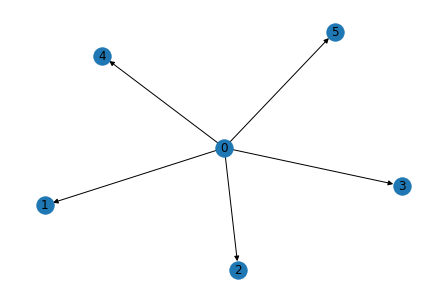

In [11]:
# Graph from a list of integer pairs.
elist = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
star4 = dgl.DGLGraph(elist)
nx.draw(star4.to_networkx(), with_labels=True)
plt.show()

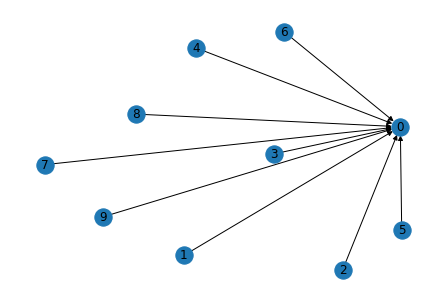

In [13]:
#Progressively adding more nodes
g = dgl.DGLGraph()
g.add_nodes(10)
# A couple edges one-by-one
for i in range(1, 4):
    g.add_edge(i, 0)
# A few more with a paired list
src = list(range(5, 8)); dst = [0]*3
g.add_edges(src, dst)
# finish with a pair of tensors
src = th.tensor([8, 9]); dst = th.tensor([0, 0])
g.add_edges(src, dst)

# Edge broadcasting will do star graph in one go!
g.clear(); g.add_nodes(10)
src = th.tensor(list(range(1, 10)));
g.add_edges(src, 0)

# Visualize the graph.
nx.draw(g.to_networkx(), with_labels=True)
plt.show()

In [0]:
#Assigning the features
x = th.randn(10, 3)
g.ndata['x'] = x
#ndata-access feature data of all the nodes
g.ndata['x'][0] = th.zeros(1, 3)
g.ndata['x'][[0, 1, 2]] = th.zeros(3, 3)
g.ndata['x'][th.tensor([0, 1, 2])] = th.randn((3, 3))


In [0]:
g.edata['w'] = th.randn(9, 2)

# Access edge set with IDs in integer, list, or integer tensor
g.edata['w'][1] = th.randn(1, 2)
g.edata['w'][[0, 1, 2]] = th.zeros(3, 2)
g.edata['w'][th.tensor([0, 1, 2])] = th.zeros(3, 2)

# You can get the edge ids by giving endpoints, which are useful for accessing the features.
g.edata['w'][g.edge_id(1, 0)] = th.ones(1, 2)                   # edge 1 -> 0
g.edata['w'][g.edge_ids([1, 2, 3], [0, 0, 0])] = th.ones(3, 2)  # edges [1, 2, 3] -> 0
# Use edge broadcasting whenever applicable.
g.edata['w'][g.edge_ids([1, 2, 3], 0)] = th.ones(3, 2)          # edges [1, 2, 3] -> 0

In [19]:
print(g.node_attr_schemes())

{'x': Scheme(shape=(3,), dtype=torch.float32)}


In [20]:
g.ndata['x'] = th.zeros((10, 4))
print(g.node_attr_schemes())

{'x': Scheme(shape=(4,), dtype=torch.float32)}


In [21]:
#Remove nodes or edge states from graph
g.ndata.pop('x')
g.edata.pop('w')

tensor([[ 1.0000,  1.0000],
        [ 1.0000,  1.0000],
        [ 1.0000,  1.0000],
        [ 0.5614, -0.2980],
        [ 0.6488, -0.7119],
        [ 1.1129,  1.1086],
        [-0.4639,  1.8003],
        [-1.8631, -0.8808],
        [-0.0875,  0.2721]])

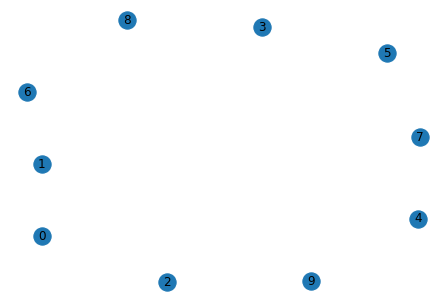

In [27]:
#Multigraphs
g_multi = dgl.DGLGraph()
g_multi.add_nodes(10)
g_multi.ndata['x'] = th.randn(10, 2)
nx.draw(g_multi.to_networkx(), with_labels=True)
plt.show()

(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 1]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))


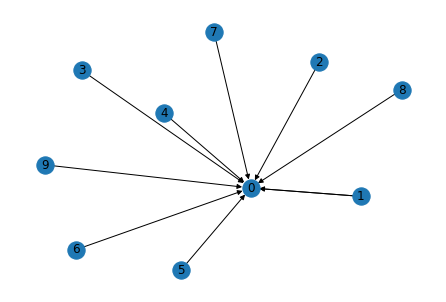

In [28]:
g_multi.add_edges(list(range(1, 10)), 0)
g_multi.add_edge(1, 0) # two edges on 1->0

g_multi.edata['w'] = th.randn(10, 2)
g_multi.edges[1].data['w'] = th.zeros(1, 2)
print(g_multi.edges())
nx.draw(g_multi.to_networkx(), with_labels=True)
plt.show()

In [29]:
eid_10 = g_multi.edge_id(1, 0, return_array=True)
g_multi.edges[eid_10].data['w'] = th.ones(len(eid_10), 2)
print(g_multi.edata['w'])

tensor([[ 1.0000,  1.0000],
        [ 0.0000,  0.0000],
        [-0.7614, -0.1298],
        [-0.2415, -0.3076],
        [ 0.3509,  0.8538],
        [-0.4023,  0.0723],
        [-0.7566, -1.0213],
        [-0.8038,  0.1943],
        [ 0.1286,  1.2531],
        [ 1.0000,  1.0000]])
